In [ ]:
!pip install --upgrade xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
import urllib.request

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import sklearn.model_selection as ms
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler


**Lendo arquivo**

In [ ]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00192/BreastTissue.xls"


with urllib.request.urlopen(url) as response:
    htmlSource = response.read()


In [ ]:
df = pd.read_excel(io=htmlSource,sheet_name='Data')


**Excluindo coluna que nao sera utilizada**

In [ ]:
df.drop(['Case #'],1,inplace=True)
df.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,car,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,car,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,car,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,car,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,car,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


**Analisando dados**

In [ ]:
#tipos de atributos alvos
df['Class'].unique()

array(['car', 'fad', 'mas', 'gla', 'con', 'adi'], dtype=object)

In [ ]:
#verificando se existem valores nulos
df.isnull().values.any()

False

**Transformando coluna class para int**

In [ ]:
df['Class'] = df['Class'].map({'car' :0, 'fad' :1, 'mas' :2, 'gla' :3, 'con': 4, 'adi' :5 }).astype(int)

df.head()

,Class,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,0,524.794072,0.187448,0.032114,228.800228,6843.598481,29.910803,60.204880,220.737212,556.828334
1,0,330.000000,0.226893,0.265290,121.154201,3163.239472,26.109202,69.717361,99.084964,400.225776
2,0,551.879287,0.232478,0.063530,264.804935,11888.391827,44.894903,77.793297,253.785300,656.769449
3,0,380.000000,0.240855,0.286234,137.640111,5402.171180,39.248524,88.758446,105.198568,493.701814
4,0,362.831266,0.200713,0.244346,124.912559,3290.462446,26.342127,69.389389,103.866552,424.796503


**Verificando o tipo dos dados**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Class   106 non-null    int64  
 1   I0      106 non-null    float64
 2   PA500   106 non-null    float64
 3   HFS     106 non-null    float64
 4   DA      106 non-null    float64
 5   Area    106 non-null    float64
 6   A/DA    106 non-null    float64
 7   Max IP  106 non-null    float64
 8   DR      106 non-null    float64
 9   P       106 non-null    float64
dtypes: float64(9), int64(1)
memory usage: 8.4 KB


**Grafico de correlacao de atributos**

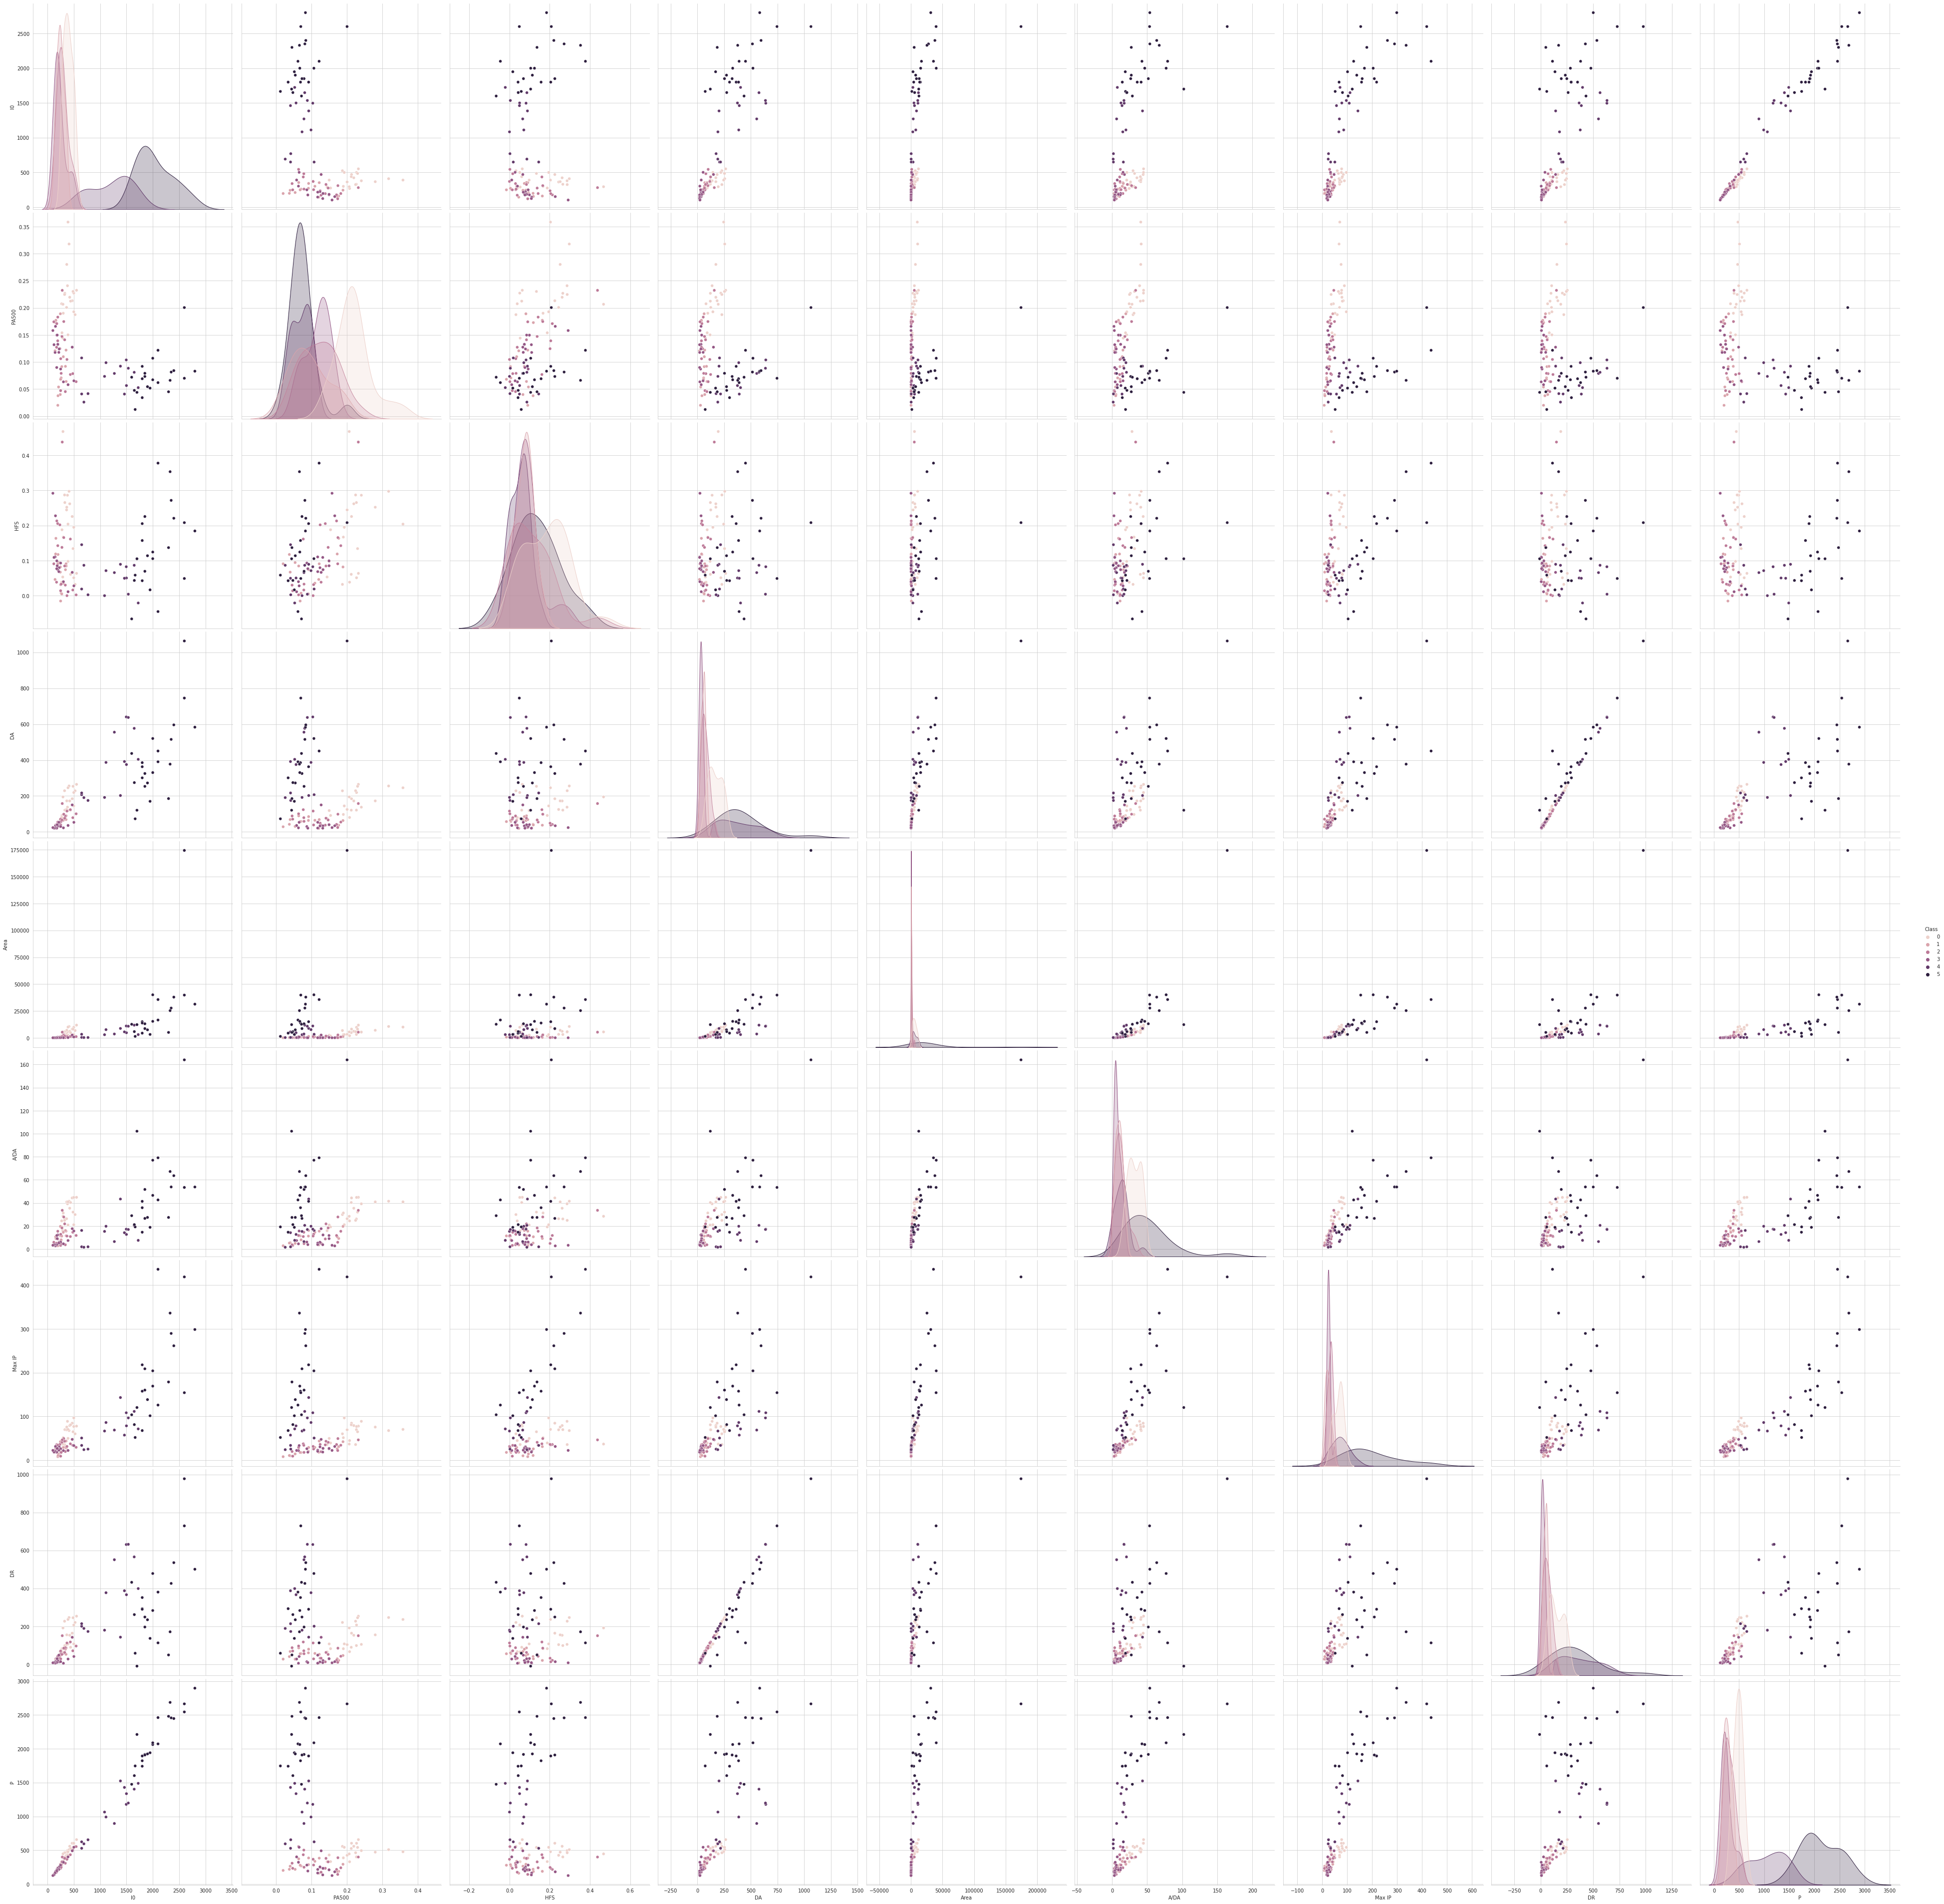

In [ ]:
sns.set_style("whitegrid")
sns.pairplot(df, hue="Class", height=6)
plt.show()

In [ ]:
x=np.array(df.drop(['Class'],1))
y=np.array(df['Class'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


**Normalizando dados**

In [ ]:
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x)
data = pd.DataFrame(X_data_minmax,columns=['I0','PA500','HFS','DA','Area','A/DA','Max IP','DR','P'])
data.head()

,I0,PA500,HFS,DA,Area,A/DA,Max IP,DR,P
0,0.156394,0.506054,0.184314,0.200377,0.038835,0.174272,0.122010,0.233069,0.155812
1,0.084168,0.620081,0.620915,0.097248,0.017733,0.150875,0.144228,0.109791,0.099310
2,0.166437,0.636226,0.243137,0.234871,0.067760,0.266496,0.163092,0.266559,0.191871
3,0.102707,0.660444,0.660131,0.113042,0.030570,0.231744,0.188703,0.115986,0.133036
4,0.096341,0.544400,0.581699,0.100848,0.018462,0.152308,0.143462,0.114636,0.108175


**Treinos e testes**

In [ ]:
X_treino, X_teste, y_treino, y_teste = train_test_split(data, y,test_size=0.2, random_state = 10)

knn_clf=KNeighborsClassifier(n_neighbors=5)

knn_clf.fit(X_treino,y_treino)

kfold = KFold(n_splits=5,random_state=10,shuffle=True)

predict=cross_val_score(knn_clf,data,y,cv=kfold,scoring='accuracy')


In [ ]:
predict.mean()

0.6502164502164502

**Gerando matriz de confusao e relatorio**

In [ ]:
predict2=knn_clf.predict(X_teste)
resultado = confusion_matrix(y_teste, predict2)
print("Matriz de confusao:")
print(resultado)
resultado2 = classification_report(y_teste, predict2)
print("\nRelatorio:",)
print (resultado2)
resultado3 = accuracy_score(y_teste,predict2)
print("accuracy:",resultado3)

Matriz de confusao:
[[5 0 0 0 0 0]
 [0 1 0 1 0 0]
 [1 4 1 0 0 0]
 [0 0 0 3 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 5]]

Relatorio:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91         5
           1       0.20      0.50      0.29         2
           2       1.00      0.17      0.29         6
           3       0.75      1.00      0.86         3
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5

    accuracy                           0.73        22
   macro avg       0.80      0.78      0.72        22
weighted avg       0.86      0.73      0.70        22

accuracy: 0.7272727272727273


**SVM**

**Treinando modelo**

In [ ]:
classifier = SVC(kernel='linear')
classifier.fit(X_treino, y_treino)


SVC(kernel='linear')

**Previsao**

In [ ]:
kfold = KFold(n_splits=5,random_state=10,shuffle=True)

predict3=cross_val_score(classifier,data,y,cv=kfold,scoring='accuracy')

predict3.mean()

0.5372294372294373

**Matriz de confusao**

In [ ]:
y_pred = classifier.predict(X_teste)
cm = confusion_matrix(y_teste, y_pred)
print("Matriz de confusao:")
print(cm)
print("\nAccuracy:", accuracy_score(y_teste, y_pred))

Matriz de confusao:
[[5 0 0 0 0 0]
 [0 2 0 0 0 0]
 [1 4 0 1 0 0]
 [0 3 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 0 0 5]]

Accuracy: 0.5909090909090909
